<a href="https://colab.research.google.com/github/chaitanyavaleti/OnlineShopping_CustomerConversion/blob/main/ML_CustomerConversion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif, SelectKBest

import warnings
warnings.filterwarnings('ignore')

In [ ]:
train = pd.read_csv("/content/sample_data/train_data.csv")

train.head()

,year,month,day,order,country,session_id,page1_main_category,page2_clothing_model,colour,location,model_photography,price,price_2,page
0,2008,6,22,21,29,15648,3,C20,13,1,2,48,1,2
1,2008,5,19,6,29,10018,2,B26,13,3,1,57,1,2
2,2008,7,15,2,29,19388,3,C13,9,5,1,48,1,1
3,2008,5,2,2,29,7181,2,B11,2,4,1,43,2,1
4,2008,6,9,16,29,13493,2,B31,9,5,1,57,1,2


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132379 entries, 0 to 132378
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   year                  132379 non-null  int64 
 1   month                 132379 non-null  int64 
 2   day                   132379 non-null  int64 
 3   order                 132379 non-null  int64 
 4   country               132379 non-null  int64 
 5   session_id            132379 non-null  int64 
 6   page1_main_category   132379 non-null  int64 
 7   page2_clothing_model  132379 non-null  object
 8   colour                132379 non-null  int64 
 9   location              132379 non-null  int64 
 10  model_photography     132379 non-null  int64 
 11  price                 132379 non-null  int64 
 12  price_2               132379 non-null  int64 
 13  page                  132379 non-null  int64 
dtypes: int64(13), object(1)
memory usage: 14.1+ MB


In [ ]:
train.describe()

,year,month,day,order,country,session_id,page1_main_category,colour,location,model_photography,price,price_2,page
count,132379.0,132379.000000,132379.000000,132379.000000,132379.000000,132379.000000,132379.000000,132379.000000,132379.000000,132379.000000,132379.000000,132379.000000,132379.000000
mean,2008.0,5.582759,14.507671,9.811314,26.949629,12038.722063,2.400426,6.227393,3.261106,1.260026,43.788191,1.488484,1.712137
std,0.0,1.328064,8.829106,13.458937,7.153071,7012.460866,1.145004,4.238354,1.714058,0.438650,12.539390,0.499869,0.983699
min,2008.0,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000
25%,2008.0,4.000000,7.000000,2.000000,29.000000,5905.000000,1.000000,3.000000,2.000000,1.000000,33.000000,1.000000,1.000000
50%,2008.0,5.000000,14.000000,6.000000,29.000000,11931.000000,2.000000,4.000000,3.000000,1.000000,43.000000,1.000000,1.000000
75%,2008.0,7.000000,22.000000,12.000000,29.000000,18212.000000,3.000000,9.000000,5.000000,2.000000,52.000000,2.000000,2.000000
max,2008.0,8.000000,31.000000,195.000000,47.000000,24026.000000,4.000000,14.000000,6.000000,2.000000,82.000000,2.000000,5.000000


In [ ]:
train["price_2"].unique()

array([1, 2])

In [ ]:
encoders = {}
for col in train.columns:
    if train[col].dtype == 'object':
            label_encoder = LabelEncoder()
            train[col] = label_encoder.fit_transform(train[col])
            encoders[col] = label_encoder
train["price_2"] = train["price_2"] - 1

In [ ]:
test = pd.read_csv("/content/sample_data/test_data.csv")

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33095 entries, 0 to 33094
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  33095 non-null  int64 
 1   month                 33095 non-null  int64 
 2   day                   33095 non-null  int64 
 3   order                 33095 non-null  int64 
 4   country               33095 non-null  int64 
 5   session_id            33095 non-null  int64 
 6   page1_main_category   33095 non-null  int64 
 7   page2_clothing_model  33095 non-null  object
 8   colour                33095 non-null  int64 
 9   location              33095 non-null  int64 
 10  model_photography     33095 non-null  int64 
 11  price                 33095 non-null  int64 
 12  price_2               33095 non-null  int64 
 13  page                  33095 non-null  int64 
dtypes: int64(13), object(1)
memory usage: 3.5+ MB


In [ ]:
train.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
132374,False
132375,False
132376,False
132377,False


**Visualizations**

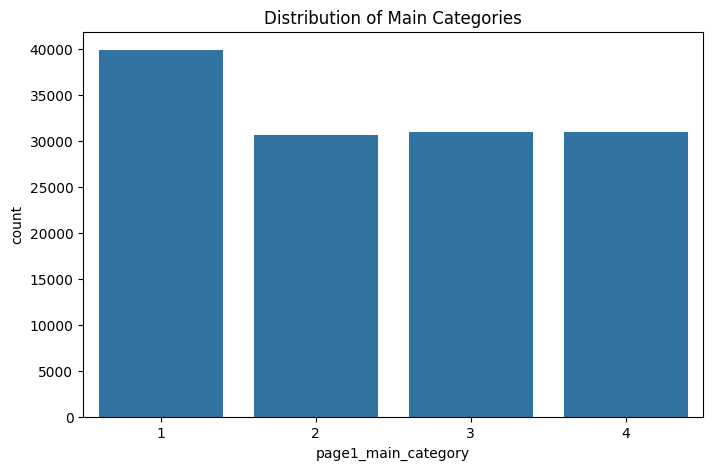

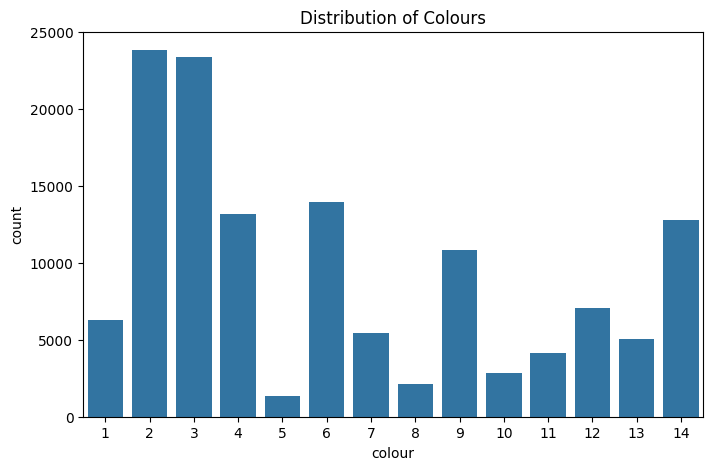

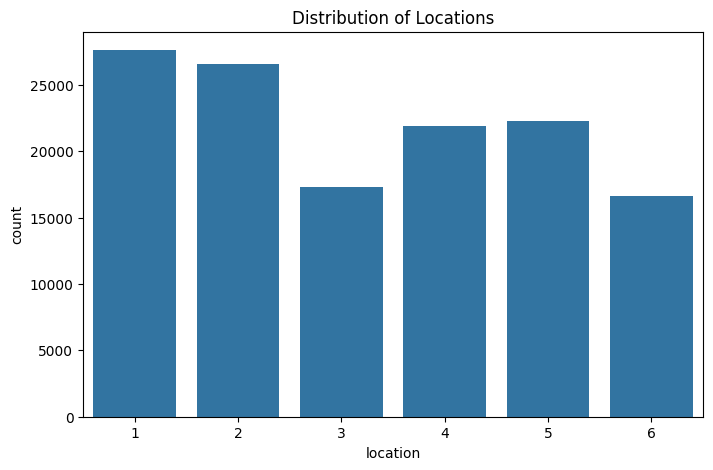

In [ ]:
# Main category frequency
plt.figure(figsize=(8,5))
sns.countplot(x="page1_main_category", data=train)
plt.title("Distribution of Main Categories")
plt.show()

# Colour frequency
plt.figure(figsize=(8,5))
sns.countplot(x="colour", data=train)
plt.title("Distribution of Colours")
plt.show()

# Location frequency
plt.figure(figsize=(8,5))
sns.countplot(x="location", data=train)
plt.title("Distribution of Locations")
plt.show()

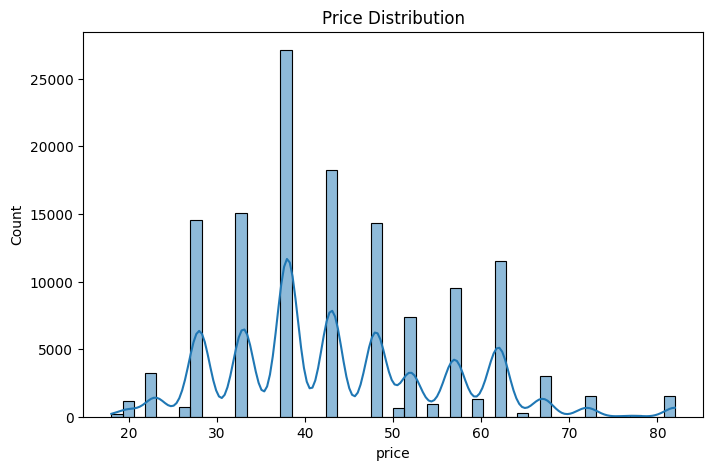

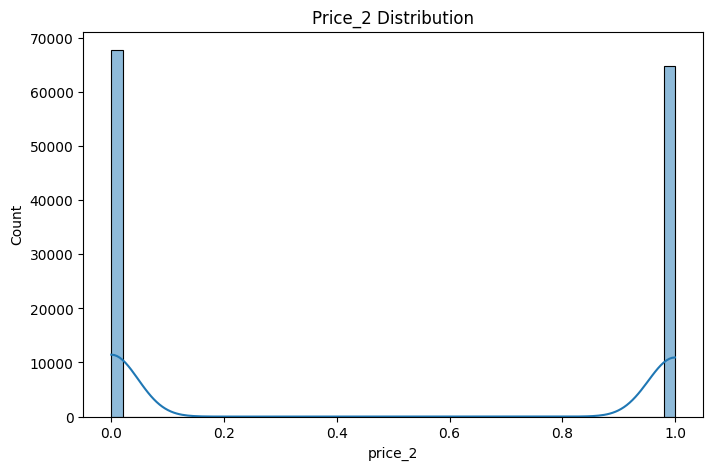

In [ ]:
# Price distribution
plt.figure(figsize=(8,5))
sns.histplot(train["price"], bins=50, kde=True)
plt.title("Price Distribution")
plt.show()

# Price_2 distribution
plt.figure(figsize=(8,5))
sns.histplot(train["price_2"], bins=50, kde=True)
plt.title("Price_2 Distribution")
plt.show()

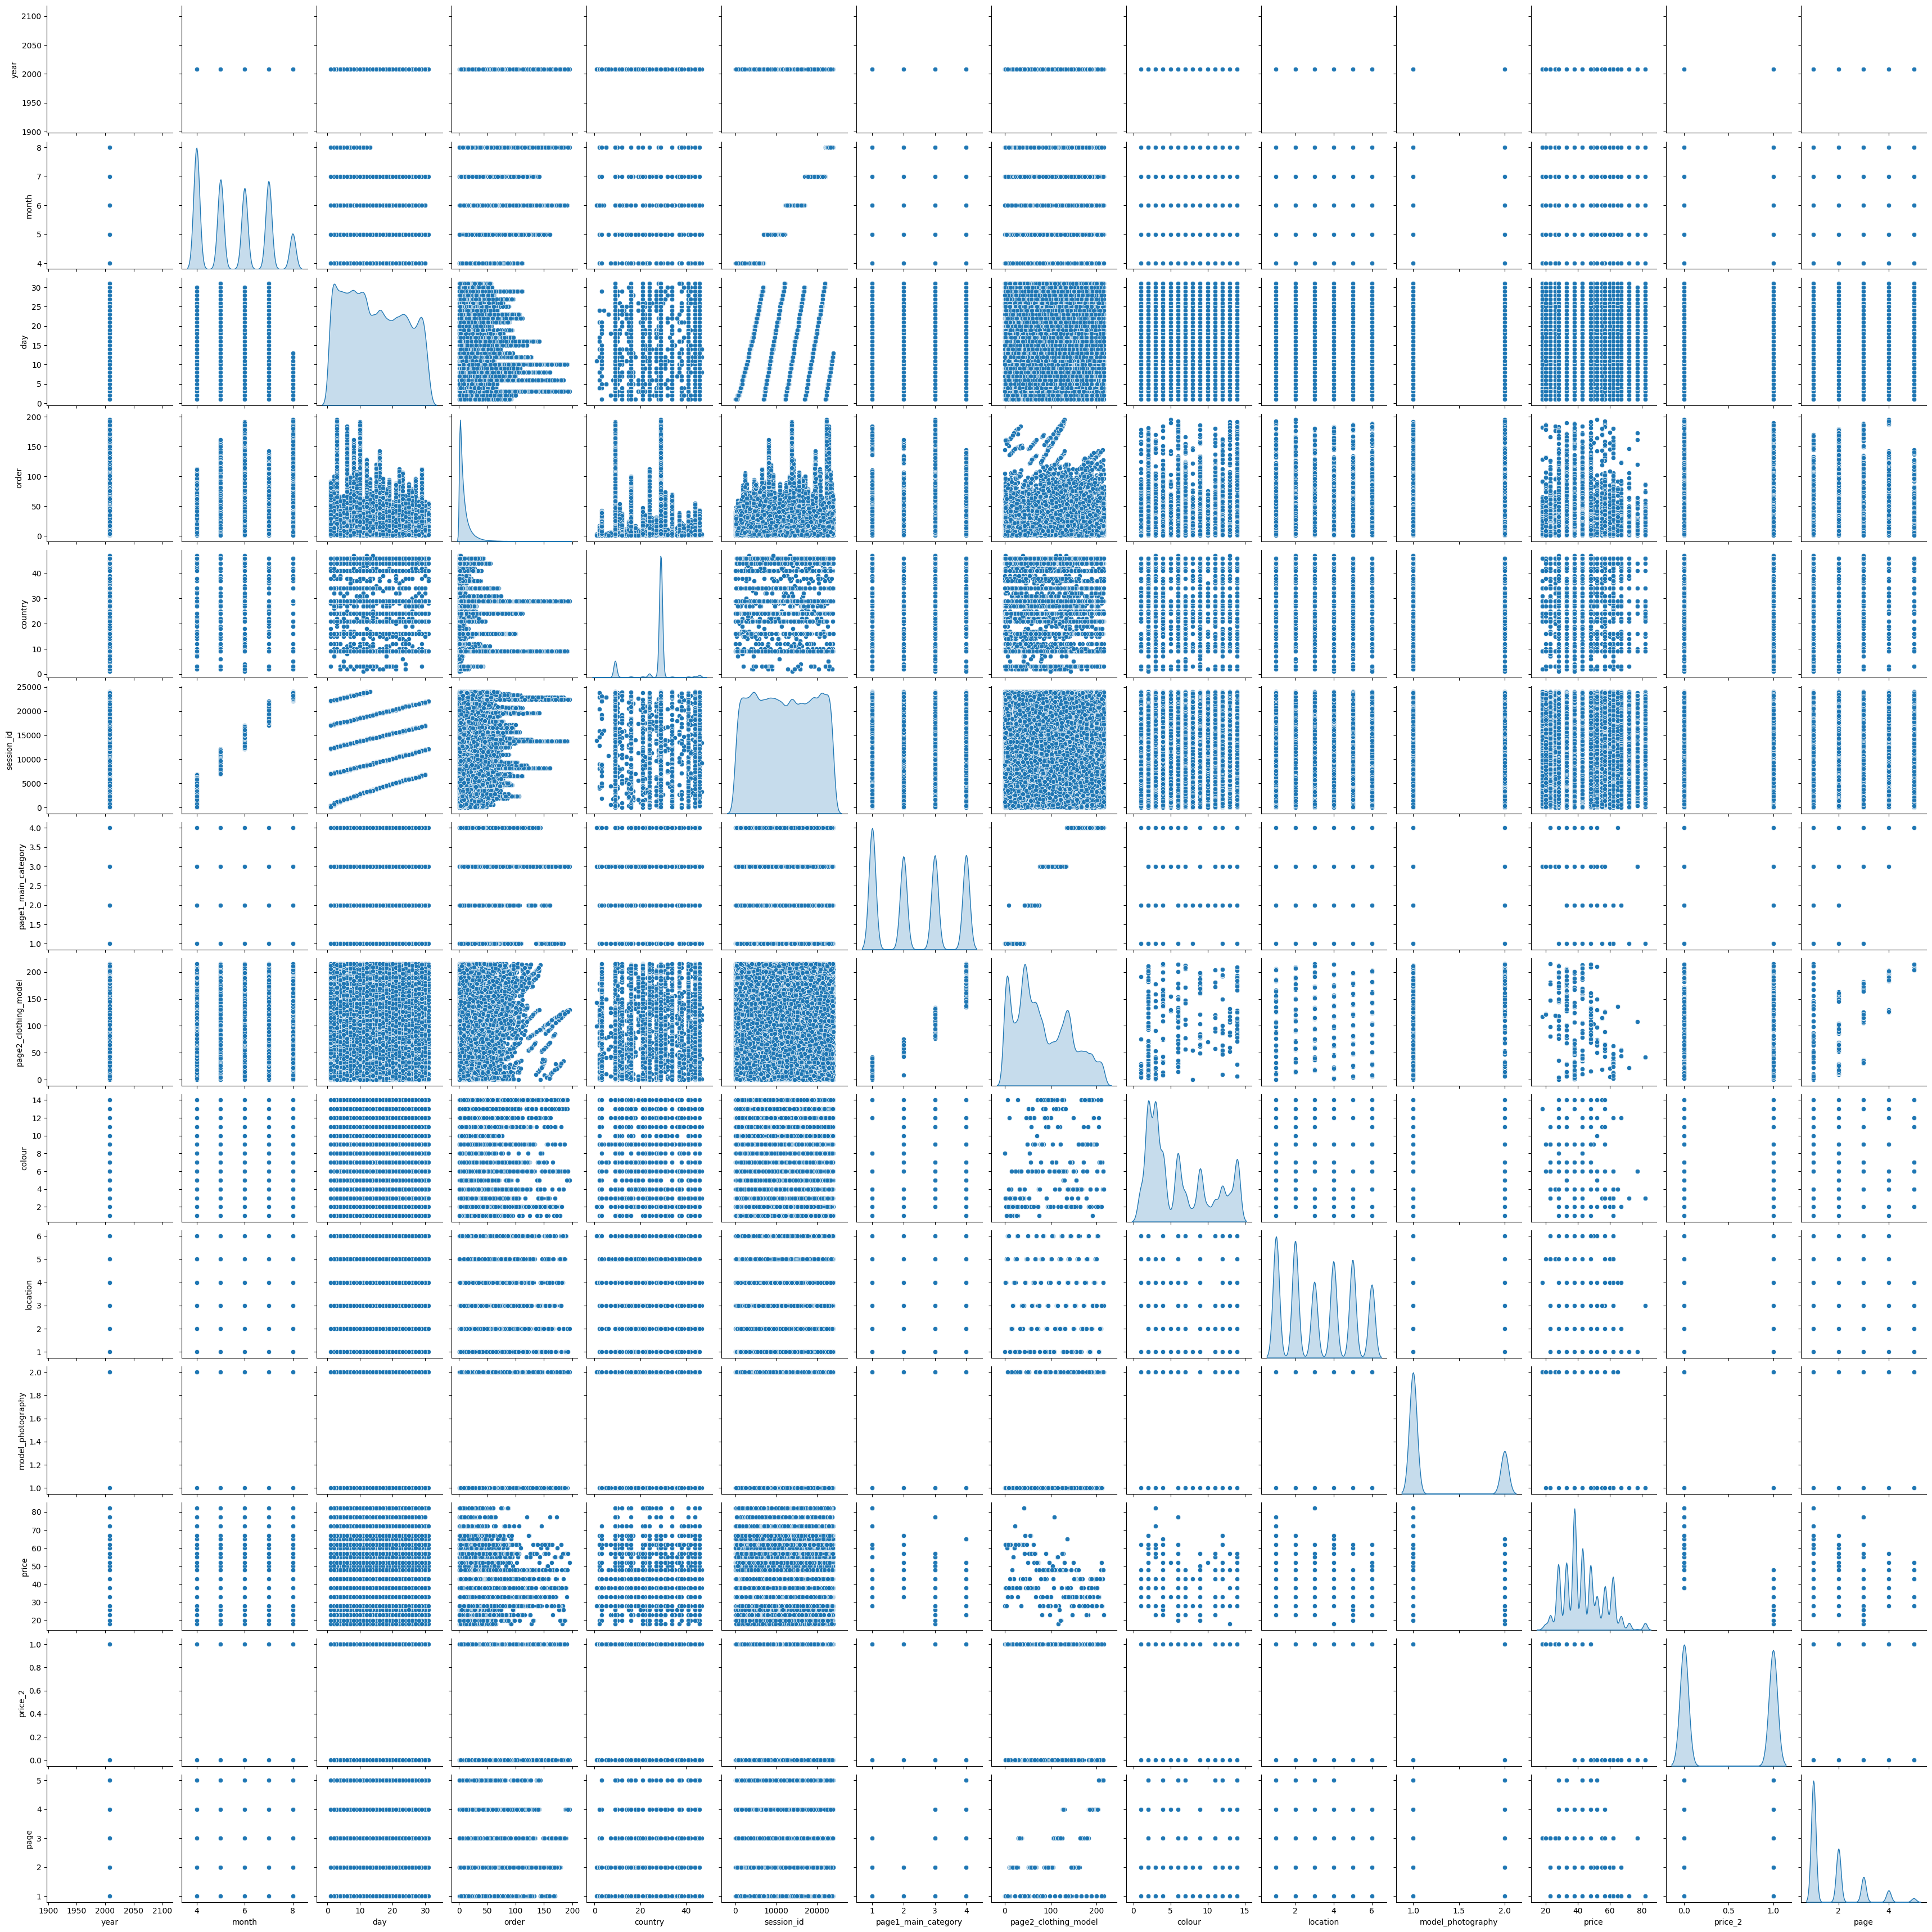

In [ ]:
sns.pairplot(train, diag_kind="kde")
plt.show()

**Session Analysis**

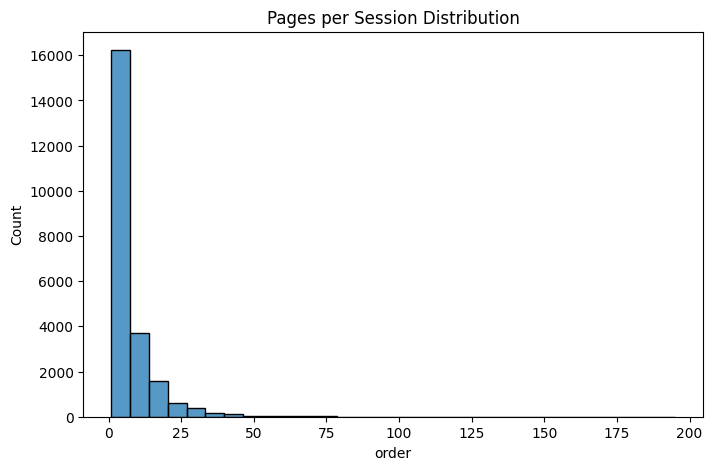

Bounce Rate: 20.54%


In [ ]:
pages_per_session = train.groupby("session_id")["order"].max()

plt.figure(figsize=(8,5))
sns.histplot(pages_per_session, bins=30, kde=False)
plt.title("Pages per Session Distribution")
plt.show()

# Bounce rate (sessions with only one page)
bounce_rate = (pages_per_session == 1).mean() * 100
print(f"Bounce Rate: {bounce_rate:.2f}%")

**Variable Selection: Correlation Matrix**

Correlation matrix is used to understand how variables are related to each other and to identify patterns, dependencies, and potential associations between variables. This information is crucial for tasks such as feature selection, detecting multicollinearity, exploring data relationships, and making informed decisions in statistical analysis and predictive modeling

Text(0.5, 1.0, 'pearson correlation')

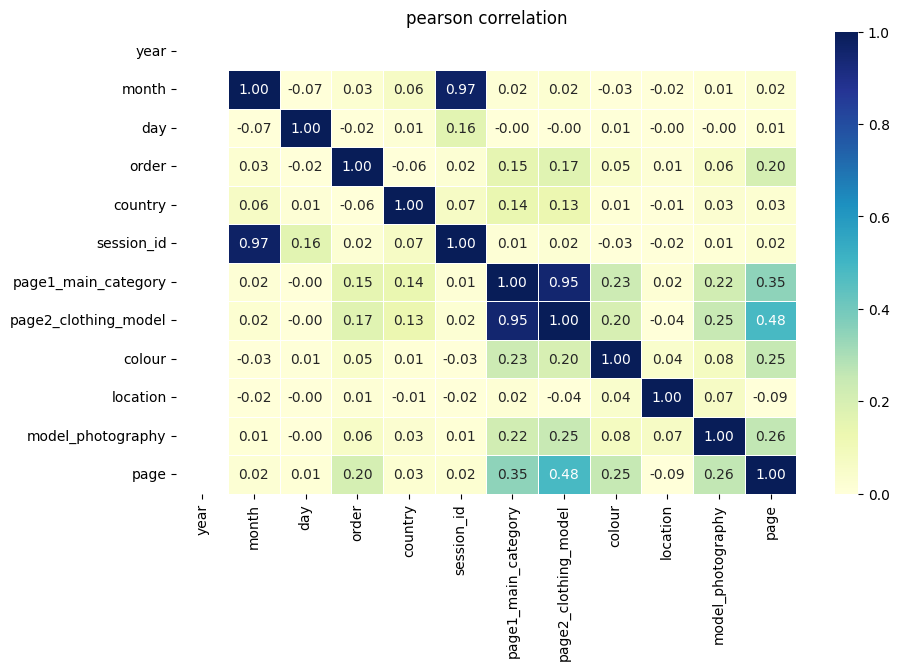

In [ ]:
train_copy2 = train.drop(['price','price_2'], axis=1)
plt.figure(figsize=(10,6))
corr_matrix = train_copy2.corr(method="pearson")
for col in corr_matrix.columns:
    if not pd.api.types.is_numeric_dtype(corr_matrix[col]):
        print(f"Warning: Column '{col}' in the correlation matrix is not numeric.")
sns.heatmap(corr_matrix, vmin=0, vmax=1, annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5)
plt.title("pearson correlation")


**Time-based Analysis**

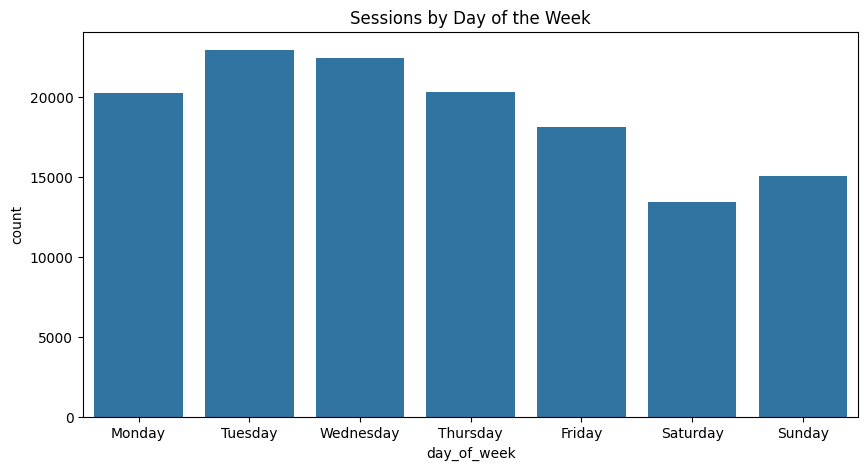

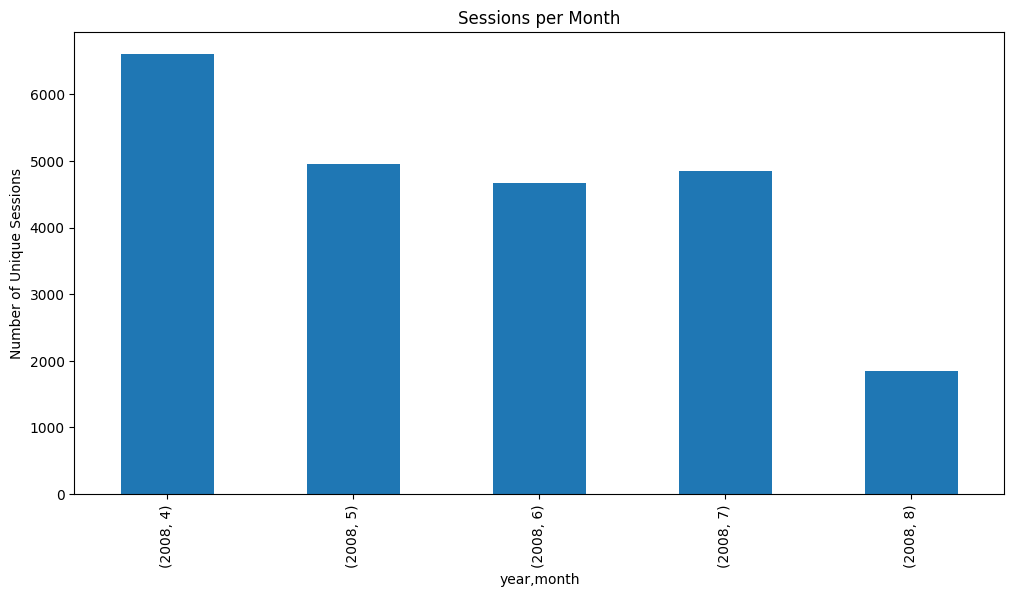

In [ ]:
train["date"] = pd.to_datetime(train[["year", "month", "day"]])

# Day of the week
train["day_of_week"] = train["date"].dt.day_name()

plt.figure(figsize=(10,5))
sns.countplot(x="day_of_week", data=train, order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
plt.title("Sessions by Day of the Week")
plt.show()

# Sessions per month
sessions_per_month = train.groupby(["year","month"])["session_id"].nunique()

plt.figure(figsize=(12,6))
sessions_per_month.plot(kind="bar")
plt.title("Sessions per Month")
plt.ylabel("Number of Unique Sessions")
plt.show()

**Feature Engineering**

**Session Metrics**

In [ ]:
train["page1_main_category"].unique()

array([3, 2, 1, 4])

In [ ]:
# Session length = number of pages in session
session_length = train.groupby("session_id")["order"].max()

# Number of clicks (same as session length here)
clicks_per_session = session_length

# Average session length
print("Average session length (pages):", session_length.mean())

# Time spent proxy: assume each page ~30 seconds (can adjust)
train["time_spent"] = 30  # seconds per page
session_time = train.groupby("session_id")["time_spent"].sum()

print("Average session time (seconds):", session_time.mean())

# Time spent per category
time_per_category = train.groupby("page1_main_category")["time_spent"].sum().sort_values(ascending=False)
print(time_per_category)

Average session length (pages): 6.9823657791357485
Average session time (seconds): 173.34657354866872
page1_main_category
1    1196730
4     929820
3     927330
2     917490
Name: time_spent, dtype: int64


**Behavioral Metrics**

In [ ]:
# Bounce Rate: single-page sessions
bounce_rate = (session_length == 1).mean() * 100
print(f"Bounce Rate: {bounce_rate:.2f}%")

df_sorted = train.sort_values(["session_id", "order"])

# Exit Rate: last page viewed distribution
exit_pages = df_sorted.groupby("session_id").tail(1)["page1_main_category"].value_counts(normalize=True) * 100
print("Exit Rates by Category:\n", exit_pages)

# Revisit Rate: users who visit the same category multiple times in one session
def revisit_ratio(seq):
    return len(seq) != len(set(seq))  # True if revisits exist

click_sequences = df_sorted.groupby("session_id")["page1_main_category"].apply(list)

revisit_rate = click_sequences.apply(revisit_ratio).mean() * 100
print(f"Revisit Rate: {revisit_rate:.2f}%")

Bounce Rate: 20.54%
Exit Rates by Category:
 page1_main_category
1    27.948494
2    25.211698
4    23.945875
3    22.893933
Name: proportion, dtype: float64
Revisit Rate: 70.37%


In [ ]:
train['converted'] = train['order'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
print(train['order'].min())
print(train['converted'].unique())

1
[1]


converted
1    100.0
Name: proportion, dtype: float64


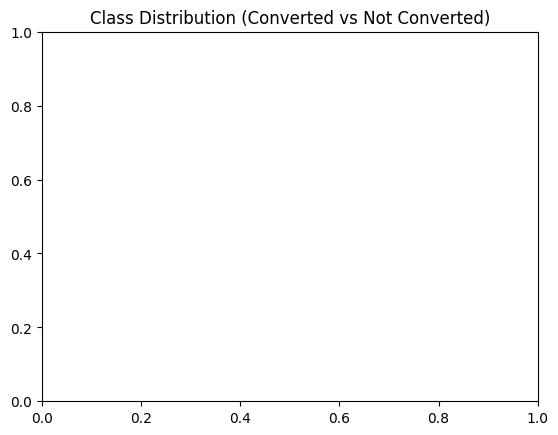

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

y_converted = train['converted']
X_converted = train.drop(columns=['converted', 'session_id', 'page2_clothing_model'])
# Check class distribution
print(y_converted.value_counts(normalize=True) * 100)

# Visualize
sns.countplot(X_converted=y_converted)
plt.title("Class Distribution (Converted vs Not Converted)")
plt.show()

In [ ]:
y_price = train["price"]
X_price = train.drop('price',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_price, y_price, train_size=0.2, random_state = 42)


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132379 entries, 0 to 132378
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   year                  132379 non-null  int64 
 1   month                 132379 non-null  int64 
 2   day                   132379 non-null  int64 
 3   order                 132379 non-null  int64 
 4   country               132379 non-null  int64 
 5   session_id            132379 non-null  int64 
 6   page1_main_category   132379 non-null  int64 
 7   page2_clothing_model  132379 non-null  object
 8   colour                132379 non-null  int64 
 9   location              132379 non-null  int64 
 10  model_photography     132379 non-null  int64 
 11  price                 132379 non-null  int64 
 12  price_2               132379 non-null  int64 
 13  page                  132379 non-null  int64 
 14  converted             132379 non-null  int64 
dtypes: int64(14), obj

In [ ]:
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

,0
page2_clothing_model,2.366440
colour,0.544049
page1_main_category,0.490013
price_2,0.444843
location,0.241705
page,0.166431
model_photography,0.064796
session_id,0.033171
order,0.016438
country,0.008572


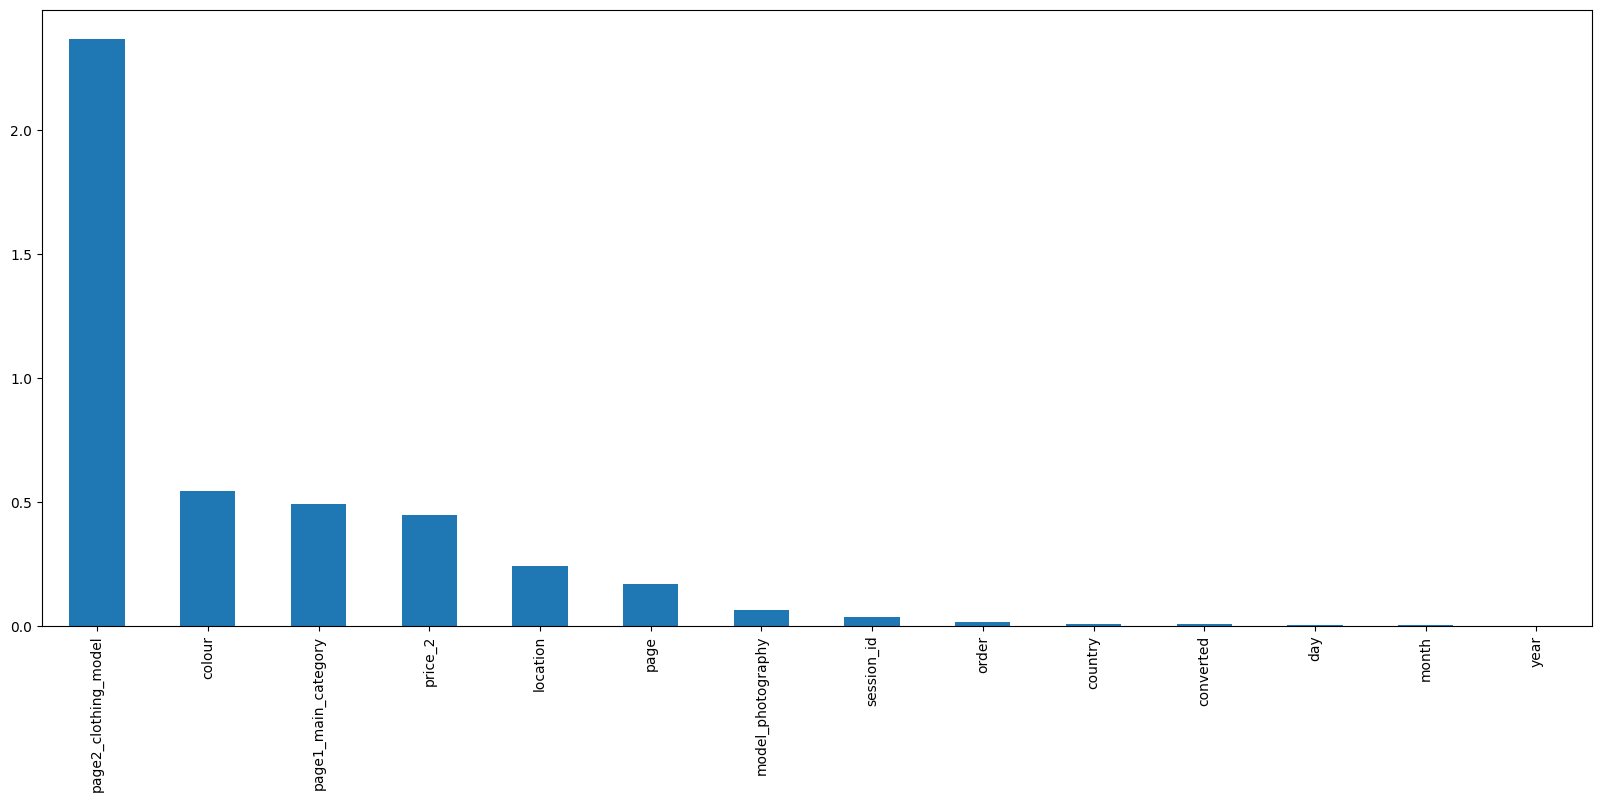

In [ ]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8));

In [ ]:
from sklearn.feature_selection import SelectKBest
sel_five_cols = SelectKBest(mutual_info_classif, k=6)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['page1_main_category', 'page2_clothing_model', 'colour', 'location',
       'price_2', 'page'],
      dtype='object')

**Model Selection using Random Forest**

In [ ]:
col=['page1_main_category', 'page2_clothing_model', 'colour','location', 'price_2', 'page']
X_train=X_train[col]
X_test=X_test[col]

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor

R2=[]
MAPE=[]
MAE=[]
RMSE=[]
acc=[]

rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
rfr_score = rfr.score(X_test,y_test)
acc.append(rfr_score)
rfr_score

0.9999894348840129

In [ ]:
columns_to_drop = ['year', 'month', 'day', 'session_id', 'model_photography', 'page','price_2','converted']
train.drop(columns_to_drop, axis=1, inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132379 entries, 0 to 132378
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   order                 132379 non-null  int64
 1   country               132379 non-null  int64
 2   page1_main_category   132379 non-null  int64
 3   page2_clothing_model  132379 non-null  int64
 4   colour                132379 non-null  int64
 5   location              132379 non-null  int64
 6   price                 132379 non-null  int64
dtypes: int64(7)
memory usage: 7.1 MB


In [ ]:
X_selected = train.drop('price', axis=1)
y_selected = train['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_selected, test_size=0.2, random_state=42)